# Results of the pipeline

903


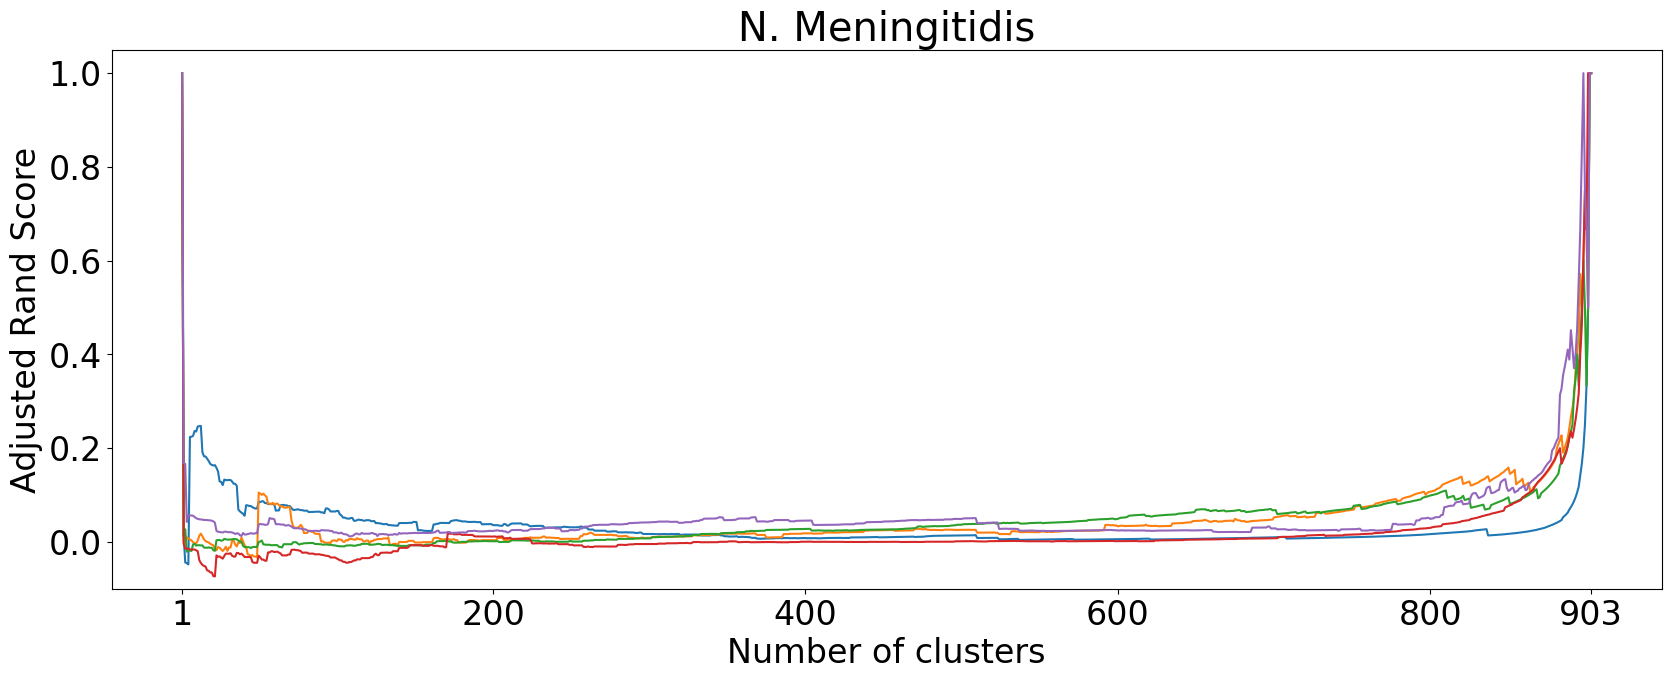

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.066673  0.043035  0.086477   0.044013  0.059919
         50               0.093917  0.065892  0.084433   0.045921  0.108856
         all              0.066403  0.070419  0.084278   0.045287  0.142571
average  10               0.148130  0.053221  0.110974   0.037977  0.065041
         50               0.133011  0.096117  0.116245   0.055960  0.128615
         all              0.121956  0.120890  0.116245   0.049119  0.174228
sum      10               0.054513  0.021515  0.047252   0.038249  0.028266
         50               0.046168  0.023923  0.046427   0.041660  0.022453
         all              0.024639  0.014657  0.046147   0.046199  0.021912
max      10               0.040311  0.034920  0.074586   0.035728  0.069718
         50               0.039128  0.032412  0.083991   0.036547  0.142681
         all              0.059808  0.017171  0.087136   0.039661  0.079677

In [4]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_bacterium.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fig, _ = plt.subplots(figsize=(20, 7))
fontsize = 24
plt.rcParams['font.size'] = f'{fontsize}'

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("N. Meningitidis")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 200)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['average']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
# plt.legend()
plt.show()
fig.savefig(Path(PATH).stem + '.eps')
r
